<a href="https://colab.research.google.com/github/Hevej/Machine-Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
import matplotlib.pyplot as plt

# Cargar Dataset

In [ ]:
(xTrain, yTrain), (xTest, yTest) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


# Normalizar [-1,1]

In [ ]:
#Imagenes
xTrain = xTrain.astype('float32')/255
xTest = xTest.astype('float32')/255

In [ ]:
#Labels
yTrain = tf.convert_to_tensor(yTrain, dtype=tf.int32)

# One-hot Encoding
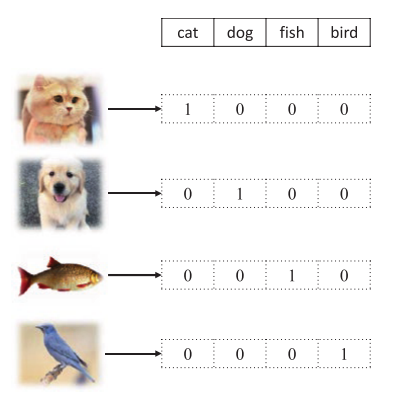

In [ ]:
#Ayuda a entrenar de mejor manera al aplicar one-hot encoding a los labels
yTrain = keras.utils.to_categorical(yTrain, 10)
yTest = keras.utils.to_categorical(yTest, 10)

# Verificar Dimensiones

In [ ]:
print(xTrain.shape, yTrain.shape)

(60000, 28, 28) (60000, 10)


# Crear Modelo

In [ ]:
model = keras.Sequential(
    [
        #Entrada grayscale
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        #salida con softmax para generar un porcentaje en la clasificación
        layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

# Entrenamiento

In [ ]:
batch_size = 32
epochs = 15

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(xTrain, yTrain,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 0.0315 - val_accuracy: 0.9912
Epoch 2/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0300 - val_accuracy: 0.9904
Epoch 3/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.0322 - val_accuracy: 0.9908
Epoch 4/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0283 - accuracy: 0.9905 - val_loss: 0.0329 - val_accuracy: 0.9905
Epoch 5/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0316 - val_accuracy: 0.9910
Epoch 6/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0283 - accuracy: 0.9902 - val_loss: 0.0315 - val_accuracy: 0.9916
Epoch 7/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0284 - val_accurac

# Grafica de error 

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  #plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

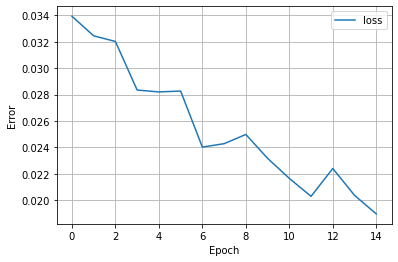

In [ ]:
plot_loss(history)

Text(0.5, 1.0, 'Training and Validation Accuracy')

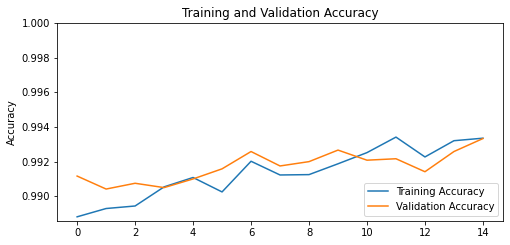

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


# Evaluar el modelo

In [ ]:
score = model.evaluate(xTest, yTest)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0286 - accuracy: 0.9918
Test loss: 0.02860224060714245
Test accuracy: 0.9918000102043152


# Exportar el modelo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Dataset_IA/'+'ModeloKerasMNIST'+'_modelo.h5')
model.save_weights('/content/drive/MyDrive/Dataset_IA/'+'ModeloKerasMNIST'+'_pesos.hdf5')

# Predicción con el modelo exportado

In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Dataset_IA/ModeloKerasMNIST_modelo.h5")

In [ ]:
reconstructed_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
image = xTrain[54].reshape(-1,28,28,1)

In [ ]:
image2 = xTest[54].reshape(-1,28,28,1)

In [ ]:
import matplotlib.pyplot as plt

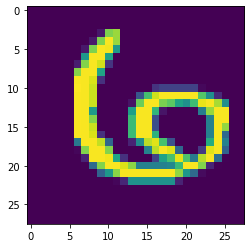

In [ ]:
plt.imshow(xTest[54])

In [ ]:
prediccion = reconstructed_model.predict(image2)

In [ ]:
prediccion.argmax()

6

# Modelo Manual

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Funcion de perdida
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat-y)
  else:
    return np.mean((y_hat - y)**2)

In [ ]:
def initializer(layers_dim):
  parameters = {}
  L = len(layers_dim)         
  for l in range(0, L-1):
      parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2) - 1
      parameters['b' + str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2) - 1
  return parameters

In [ ]:
#Funciones
def sigmoid(a, derivate=False):
  if derivate:
    return np.exp(-a)/((np.exp(-a)+1)**2)
  else:
    return 1/(1+np.exp(-a))
def softmax(a, derivate=False):
  softmax = np.exp(a) / np.sum(np.exp(a))
  if derivate:
    s = np.reshape(softmax, (1, -1)) 
    return np.diagflat(s) - np.dot(s, s.T)
  else:
    return softmax
def ReLU(a, derivate=False):
  if derivate:
    a[a<=0] = 0
    a[a>0] = 1
    return a
  else:
    return np.maximum(0,a)

In [ ]:
def train(xData, lr, params, training = True):
  #X sera la activación de entrada
  params['A0'] = xData
  #Forward
  params['Z1'] = np.matmul(params['A0'],params['W1'])+params['b1']
  params['A1'] = ReLU(params['Z1'])

  params['Z2'] = np.matmul(params['A1'],params['W2'])+params['b2']
  params['A2'] = ReLU(params['Z2'])

  params['Z3'] = np.matmul(params['A2'],params['W3'])+params['b3']
  params['A3'] = softmax(params['Z3'])

  output = params['A3']

  if training:
    #Backpropagation
    #dC/db^L = dC/da^L * da^L/dZ^L * 1 = dC/dZ = δ^L para la ultima capa
    #δ^L
    params['db3'] =  mse(Y,output,True)*softmax(params['A3'],True)
    #dC/dW^L = dC/dZ * a^(L-1) = δ^L *  a^(L-1) para la ultima capa
    #δ^L *  a^(L-1)
    params['dW3'] = np.matmul(params['A2'].T,params['db3'])

    #Capas ocultas
    #dC/db^(L-1) = δ^L * dZ^L/da^(L-1) * da^(L-1)/dZ^(L-1) =  δ^(L-1) 
    #dC/db^(L-1) = δ^L * W^L* σ'(Z^L) =  δ^(L-1)
    #δ^(L-1) 
    params['db2'] = np.matmul(params['db3'],params['W3'].T)*ReLU(params['A2'],True)
    #dC/db^(L-1) = δ^L * dZ^L/da^(L-1) * da^(L-1)/dZ^(L-1) * dZ^(L-1)/dW^(L^-1)=  δ^(L-1) * a^(L-2)
    #dC/db^(L-1) = δ^L * W^L* σ'(Z^L) * a^(L-2)=  δ^(L-1) * a^(L-2)
    #δ^(L-1) * a^(L-2)
    params['dW2'] = np.matmul(params['A1'].T,params['db2'])
            
    #El algoritmo continua hasta la capa inicial, de la misma forma
    params['db1'] = np.matmul(params['db2'],params['W2'].T)*ReLU(params['A1'],True)
    params['dW1'] = np.matmul(params['A0'].T,params['db1'])

    #Gradiente descent
    #Actualizar los pesos
    params['W3'] = params['W3'] - params['dW3']* lr
    params['b3'] = params['b3'] - (np.mean(params['db3'],axis=0, keepdims=True))* lr
    params['W2'] = params['W2'] - params['dW2']* lr
    params['b2'] = params['b2'] - (np.mean(params['db2'],axis=0, keepdims=True))* lr

    params['W1'] = params['W1'] - params['dW1']* lr
    params['b1'] = params['b1'] - (np.mean(params['db1'],axis=0, keepdims=True))* lr

  return output

In [ ]:
layer_dims = [784,2,2,1]
params = initializer(layer_dims)

In [ ]:
params['W1'].shape

(784, 2)

In [ ]:
(X, Y), (XT, YT) = datasets.mnist.load_data()

NameError: ignored

In [ ]:
#Imagenes
X = X.reshape((60000, 28*28))
X = X.astype('float32')/255

XT = XT.reshape((10000, 28*28))
XT = XT.astype('float32')/255

In [ ]:
#Tomar menos ejemplos
NX = X[1:10][:]
NY = Y[1:10][:]

In [ ]:
errors = []
for _ in range(10):
  output = train(X,0.001,params)
  if _ % 25 == 0:
    print(mse(Y,output))
    errors.append(mse(Y,output))